## Bussiness Problem Understanding

Elon Musk has started his own laptop company (Tesla Laptop) in India. He wants to give tough fights to big companies like Apple, Alienware, HP etc.

He does not know how to estimate the price of laptops his company creates. In this competitive laptop market you cannot simply assume things. 

Musk wants to find out some relation between features of a Laptop(eg:- RAM, OS,  etc) and its selling price. But he is not so good at Data Mining.

To solve this problem he already asked his Data Engineering team (from Twitter 🐥🤭) to collect laptop data from various competitors.

Now he needs your (i.e Data Scientist’s) help to solve the following problem. 🥰

# Sprint - 1 (Data Analysis and Mining)

## Musk’s Requirements

- Build an interface (using streamlit) for Elon Musk where he can enter the laptop features like RAM Size, RAM Type, HDD, OS, etc. and get the price prediction.

- Based on your Data Analysis and MIning skills, give recommendations to Elon Musk on how the pricing works in the laptop market.


Note - This is real world data. It was scrapped from Flipkart on 21-12-2022 at 11:50 AM. 


# Sprint - 2 (ML Model Tuning)

Congratulations! Elon Musk is happy with your models and insights that you have shared in the previous requirements. 

Now he wants you to test the models you have created for Underfitting and Overfitting. He wants you to build a best fit model.

## Todo - 

 - First try to check if the models you have created are a best fit or not.
 - See if applying cross validation helps improve your models performance.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset

df = pd.read_csv('laptop_details.csv')

df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


## Data understanding

In [3]:
df.shape

(720, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [5]:
df.describe()

,Rating
count,581.000000
mean,4.321170
std,0.282872
min,3.000000
25%,4.200000
50%,4.300000
75%,4.500000
max,5.000000


In [6]:
df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

## Data Preprocessing

This data needs to be lots of feature engineering because all the Features need to be process first.

- From the above observation it is clear that MRP column is object type but it should be numeric type. So we have to first convert it to numeric type. 

- Feature column has lots of data in single column. So we have separate all the data in different columns.



In [7]:
df['MRP'].head()

0    ₹36,990
1    ₹39,990
2    ₹32,990
3    ₹49,990
4    ₹49,990
Name: MRP, dtype: object

In [8]:
df['MRP'] = df['MRP'].str.replace('₹','')

In [9]:
# Removing comma and convert into numeric type
df['MRP'] = df['MRP'].str.replace(',','').astype('float64')

In [10]:
df['MRP'].head()

0    36990.0
1    39990.0
2    32990.0
3    49990.0
4    49990.0
Name: MRP, dtype: float64

In [11]:
print("Minimum value : ", df['MRP'].min())
print("Maximum value : ", df['MRP'].max())
print("Mean value : ", df['MRP'].mean())
print("Median value : ", df['MRP'].median())

Minimum value :  14990.0
Maximum value :  434830.0
Mean value :  81605.8375
Median value :  59990.0


In [12]:
print("25% quantile :",df['MRP'].quantile(0.25))

print("75% quantile :",df['MRP'].quantile(0.75))


25% quantile : 38996.75
75% quantile : 95240.0


<AxesSubplot:>

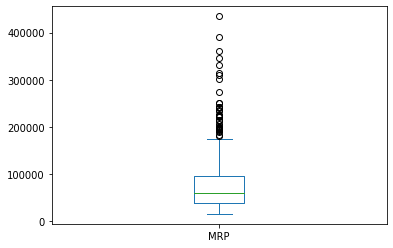

In [13]:
df['MRP'].plot(kind='box')

1.8231420803009557

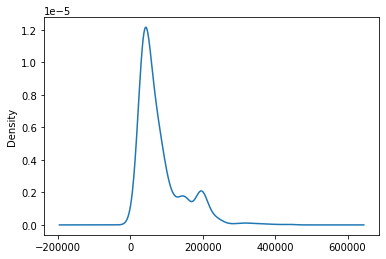

In [14]:
df['MRP'].plot(kind='kde')

df['MRP'].skew()

## Data Transformation

0.7301038030555801

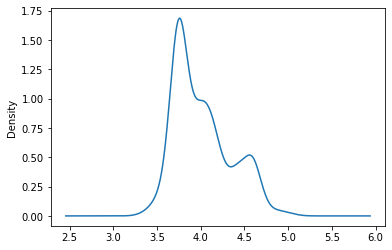

In [15]:
#Root Transformation

root = df['MRP']**(1/8)

root.plot(kind='kde')

root.skew()

0.595273916743405

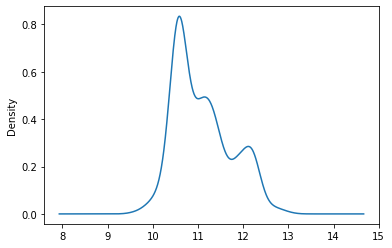

In [16]:
# Logarithmic Transformation

log = np.log(df['MRP']+1)

log.plot(kind='kde')

log.skew()

In [17]:
df['MRP'] = log

### Outliers Treatment for MRP column

In [18]:
from feature_engine.outliers import Winsorizer

win = Winsorizer(capping_method = 'iqr' , tail = 'both', fold=1.5, variables=['MRP'])

df['MRP'] = win.fit_transform(df[['MRP']])

df['MRP']

0      10.518430
1      10.596410
2      10.403990
3      10.819598
4      10.819598
         ...    
715    10.064373
716    11.204918
717    12.180709
718    11.743966
719    10.839404
Name: MRP, Length: 720, dtype: float64

<AxesSubplot:>

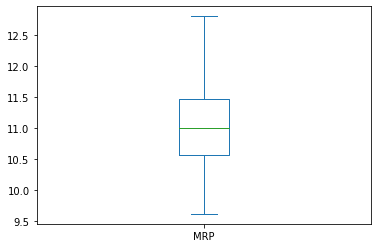

In [19]:
df['MRP'].plot(kind='box')

## Feature Engineering

In [20]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [21]:
df['Product'][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14ITL05 Thin and Light Laptop'

In [22]:
df['Feature'][0]

'Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty'

#### Extracting Brand Name from Product column

In [23]:
# Spliting Product column

temp_product = df['Product'].str.split('GB', n=3, expand=True)

temp_product

,0,1,2,3
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/256,SSD/Windows 11 Home) 14ITL05 Thin and Light L...,None
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/512,SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN ...,None
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8,/512,SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-...,None
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8,/512,SSD/Windows 10/4,Graphics/NVIDIA GeForce ...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8,/512,SSD/Windows 11 Home/4,Graphics/NVIDIA GeForce G...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,/64,EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,None
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,/512,SSD/Windows 11 Home/4,Graphic...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,/1 TB SSD/Windows 11 Home/8,Graphics/NVIDIA ...,None
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,/512,SSD/Windows 11 Home) UP5...,None


In [24]:
# Fetching Brand Name

brand = temp_product[0].str.split().str[0]

brand.value_counts()

ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: 0, dtype: int64

In [25]:
df['Brand Name'] = brand

df.head()

,Product,Rating,MRP,Feature,Brand Name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [26]:
# Here in Brand Name so many categories given. So we have to reduce the some of the columns.

df['Brand Name'] = df['Brand Name'].str.replace('realme','Others')
df['Brand Name'] = df['Brand Name'].str.replace('SAMSUNG','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Ultimus','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Vaio','Others')
df['Brand Name'] = df['Brand Name'].str.replace('GIGABYTE','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Nokia','Others')
df['Brand Name'] = df['Brand Name'].str.replace('ALIENWARE','DELL')

In [27]:
df['Brand Name'].value_counts()

ASUS         251
Lenovo       196
DELL          64
HP            61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
Others        13
Name: Brand Name, dtype: int64

#### Extracting Operating System (OS) from Feature column

In [28]:
import re

regex_os = r'(Windows|MAC)'

def extract_os(text):
    match = re.search(regex_os, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return "Others"


df['OS'] = df['Feature'].apply(extract_os)
df['OS'].value_counts()

Windows    690
Mac         19
Others      11
Name: OS, dtype: int64

In [29]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows


#### Exracting RAM Type

In [30]:
regex_ram_type = r'(DDR[0-9L]*|LPDDR[0-9X]*)'

def extract_ram_type(text):
    match = re.search(regex_ram_type, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return None

df['RAM Type'] = df['Feature'].apply(extract_ram_type)

df['RAM Type'].value_counts()

DDR4       561
DDR5        92
LPDDR4X     37
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: RAM Type, dtype: int64

In [31]:
df['RAM Type'] = df['RAM Type'].str.replace('LPDDR5','Others')
df['RAM Type'] = df['RAM Type'].str.replace('LPDDR4','Others')
df['RAM Type'] = df['RAM Type'].str.replace('LPDDR3','Others')


df['RAM Type'].value_counts()


DDR4       561
DDR5        92
OthersX     37
Others      18
Name: RAM Type, dtype: int64

In [32]:
df['RAM Type'] = df['RAM Type'].str.replace('OthersX','Others')

df['RAM Type'].value_counts()

DDR4      561
DDR5       92
Others     55
Name: RAM Type, dtype: int64

In [33]:
df['RAM Type'].isna().sum()

12

In [34]:
df['RAM Type'].fillna('Others', inplace=True)

df['RAM Type'].value_counts()

DDR4      561
DDR5       92
Others     67
Name: RAM Type, dtype: int64

In [35]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,RAM Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4


#### Extracting RAM Size

In [36]:
regex_ram_size = r'(\d+)\s*(?:GB|MB)(?:\s*DDR\d)?'


def extract_ram(text):
    match = re.search(regex_ram_size, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return None


df['RAM Size'] = df['Feature'].apply(extract_ram)


df['RAM Size'].value_counts()

8      400
16     263
4       38
32      17
128      2
Name: RAM Size, dtype: int64

In [37]:
df['RAM Size'] = df['RAM Size'].str.replace('128','32')

df['RAM Size'].value_counts()

8     400
16    263
4      38
32     19
Name: RAM Size, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float64
 3   Feature     720 non-null    object 
 4   Brand Name  720 non-null    object 
 5   OS          720 non-null    object 
 6   RAM Type    720 non-null    object 
 7   RAM Size    720 non-null    object 
dtypes: float64(2), object(6)
memory usage: 45.1+ KB


In [39]:
df['RAM Size'] = df['RAM Size'].astype('int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float64
 3   Feature     720 non-null    object 
 4   Brand Name  720 non-null    object 
 5   OS          720 non-null    object 
 6   RAM Type    720 non-null    object 
 7   RAM Size    720 non-null    int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 42.3+ KB


In [40]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,RAM Type,RAM Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8


#### Extracting Disk Type from Product column

In [41]:
df['Disk Type'] = df['Product'].apply(lambda x:'HDD' if 'HDD' in x else 'SSD' )

df['Disk Type'].value_counts()

SSD    672
HDD     48
Name: Disk Type, dtype: int64

#### Extracting Disk Size

In [42]:
temp_product[1]

0                             /256 
1                             /512 
2                             /512 
3                             /512 
4                             /512 
                   ...             
715                            /64 
716                           /512 
717    /1 TB SSD/Windows 11 Home/8 
718                           /512 
719                  /1 TB HDD/256 
Name: 1, Length: 720, dtype: object

In [43]:
Disk_size = temp_product[1].str.replace('/','')

Disk_size.value_counts()

512                                                               375
256                                                                99
1 TB SSDWindows 11 Home4                                           38
1 TB SSDWindows 11 Hom...                                          31
1 TB SSDWindows 11 Home8                                           27
1 TB HDD256                                                        26
1 TB SSDWin...                                                     25
1 TB SSDWindows 11 Home6                                           11
128                                                                 8
64                                                                  7
1 TB SSDWindows 10 Home4                                            6
1 TB SSDWindows 11 ...                                              6
1 TB SSDWindows 10 Home6                                            5
1 TB SSDWindows 10 Home8                                            4
1 TB SSDWindows 11 H

In [44]:
Disk_size = Disk_size.str.split().str[0]

Disk_size = Disk_size.astype('int')

Disk_size

0      256
1      512
2      512
3      512
4      512
      ... 
715     64
716    512
717      1
718    512
719      1
Name: 1, Length: 720, dtype: int32

In [45]:
Disk_size.value_counts()

512    375
1      223
256     99
128      8
64       7
2        7
32       1
Name: 1, dtype: int64

In [46]:
df['Disk Size'] = Disk_size

df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,RAM Type,RAM Size,Disk Type,Disk Size
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512


In [47]:
df['Disk Size'] = df['Disk Size'].replace(1,1024)
df['Disk Size'] = df['Disk Size'].replace(2,2048)

In [48]:
df['Disk Size'].value_counts()

512     375
1024    223
256      99
128       8
64        7
2048      7
32        1
Name: Disk Size, dtype: int64

In [49]:
df['Disk Size'] = df['Disk Size'].replace(32,128)
df['Disk Size'] = df['Disk Size'].replace(64,128)
df['Disk Size'] = df['Disk Size'].replace(2048,1024)

df['Disk Size'].value_counts()

512     375
1024    230
256      99
128      16
Name: Disk Size, dtype: int64

#### Extracting Processor from Feature column

In [50]:
def processor_brand(text):
    if re.search(r"intel", text, re.IGNORECASE):
        return "Intel"
    elif re.search(r"amd", text, re.IGNORECASE):
        return "AMD"
    else:
        return "Others"


df['Processor'] = df['Feature'].apply(processor_brand)
df['Processor'].value_counts()

Intel     390
AMD       310
Others     20
Name: Processor, dtype: int64

In [51]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,RAM Type,RAM Size,Disk Type,Disk Size,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel


#### Extracting Warranty

In [52]:

regex_warranty = r'(\d+)\s*(?:year|yr|y)(?:s)?'


def extract_warranty(text):
    match = re.search(regex_warranty, text, re.IGNORECASE)
    if match:
        years = int(match.group(1))
        if years == 1:
            return f"{years} year warranty"
        elif years > 1:
            return f"{years} years warranty"
    else:
        return None


df['Warranty'] = df['Feature'].apply(extract_warranty)
df['Warranty'].value_counts()

1 year warranty         479
2 years warranty         85
20212 years warranty     68
20211 years warranty     41
20191 years warranty     31
20193 years warranty      4
3 years warranty          4
32 years warranty         3
20192 years warranty      3
3652 years warranty       1
Name: Warranty, dtype: int64

In [53]:
df['Warranty'] = df['Warranty'].str.replace('1 year warranty','1')
df['Warranty'] = df['Warranty'].str.replace('2 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20212 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20211 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20191 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20193 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('3 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('32 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20192 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('3652 years warranty','2')

In [54]:
df['Warranty'].value_counts()

1        551
2         85
20212     68
3          8
32         3
20192      3
3652       1
Name: Warranty, dtype: int64

In [55]:
df['Warranty'] = df['Warranty'].str.replace('20212','2')
df['Warranty'] = df['Warranty'].str.replace('32','2')
df['Warranty'] = df['Warranty'].str.replace('20192','2')
df['Warranty'] = df['Warranty'].str.replace('20212','2')
df['Warranty'] = df['Warranty'].str.replace('3652','2')

In [56]:
df['Warranty'].value_counts()

1    551
2    160
3      8
Name: Warranty, dtype: int64

In [57]:
df['Warranty'] = df['Warranty'].str.replace('3','2')

df['Warranty'].value_counts()

1    551
2    168
Name: Warranty, dtype: int64

In [58]:
df['Warranty'].isna().sum()

1

In [59]:
df['Warranty'].fillna('2', inplace=True)

In [60]:
df['Warranty'] = df['Warranty'].astype('int32')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float64
 3   Feature     720 non-null    object 
 4   Brand Name  720 non-null    object 
 5   OS          720 non-null    object 
 6   RAM Type    720 non-null    object 
 7   RAM Size    720 non-null    int32  
 8   Disk Type   720 non-null    object 
 9   Disk Size   720 non-null    int32  
 10  Processor   720 non-null    object 
 11  Warranty    720 non-null    int32  
dtypes: float64(2), int32(3), object(7)
memory usage: 59.2+ KB


In [62]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,RAM Type,RAM Size,Disk Type,Disk Size,Processor,Warranty
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,2
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,2
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,1
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,1
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,1


In [63]:
df = df.rename(columns={'MRP': 'Price'})

In [64]:
df.head()

,Product,Rating,Price,Feature,Brand Name,OS,RAM Type,RAM Size,Disk Type,Disk Size,Processor,Warranty
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,2
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,2
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,1
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,1
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,1


In [65]:
# Reassigning the columns

df = df[['Brand Name','OS','RAM Type','RAM Size','Processor','Warranty','Disk Type','Disk Size', 'Price']]

df.head()

,Brand Name,OS,RAM Type,RAM Size,Processor,Warranty,Disk Type,Disk Size,Price
0,Lenovo,Windows,DDR4,8,Intel,2,SSD,256,10.518430
1,Lenovo,Windows,DDR4,8,Intel,2,SSD,512,10.596410
2,ASUS,Windows,DDR4,8,Intel,1,SSD,512,10.403990
3,HP,Windows,DDR4,8,AMD,1,SSD,512,10.819598
4,ASUS,Windows,DDR4,8,Intel,1,SSD,512,10.819598


In [66]:
# Converting Price Column into normal using exponential

price = df['Price']

df['Price'] = np.exp(price)

In [67]:
df['Price'] = df['Price'].astype('int')

df['Price'].value_counts()

39990     61
36991     39
85991     34
38706     30
196991    30
          ..
301990     1
37001      1
42691      1
140991     1
23491      1
Name: Price, Length: 250, dtype: int64

In [68]:
df.to_csv("cleaned_laptop_details.csv")

In [69]:
df.head()

,Brand Name,OS,RAM Type,RAM Size,Processor,Warranty,Disk Type,Disk Size,Price
0,Lenovo,Windows,DDR4,8,Intel,2,SSD,256,36991
1,Lenovo,Windows,DDR4,8,Intel,2,SSD,512,39990
2,ASUS,Windows,DDR4,8,Intel,1,SSD,512,32990
3,HP,Windows,DDR4,8,AMD,1,SSD,512,49990
4,ASUS,Windows,DDR4,8,Intel,1,SSD,512,49990


## EDA ( Data Visualization)

### Univariate analysis

#### Brand Name

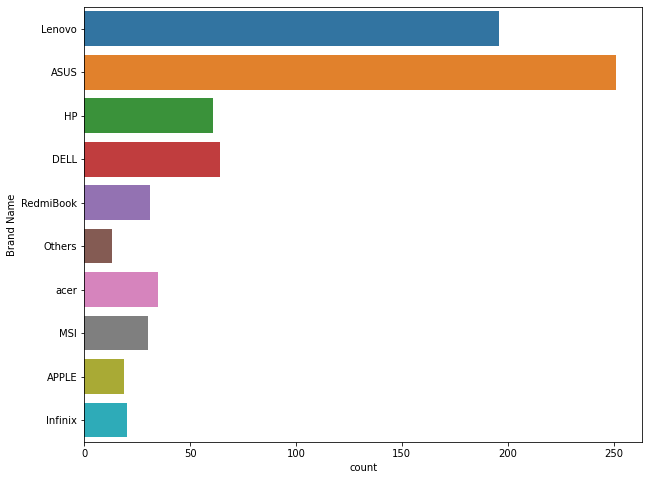

In [70]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['Brand Name'])
plt.show()

### Operating System 

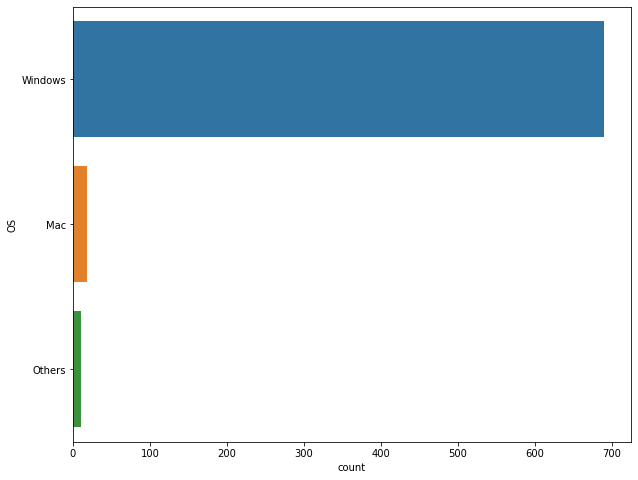

In [71]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['OS'])
plt.show()

### RAM Type

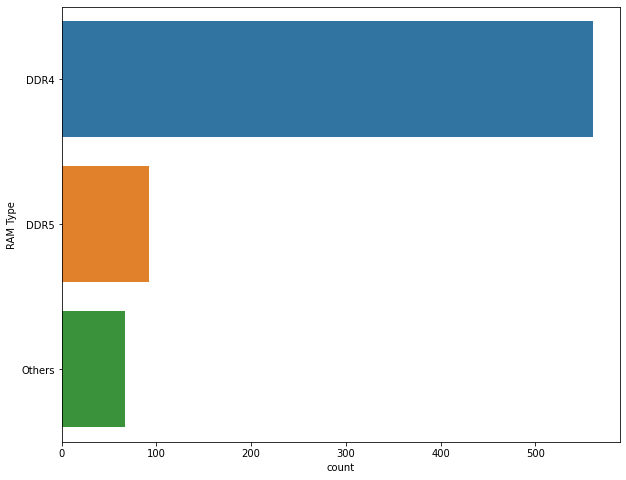

In [72]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['RAM Type'])
plt.show()

### RAM Size

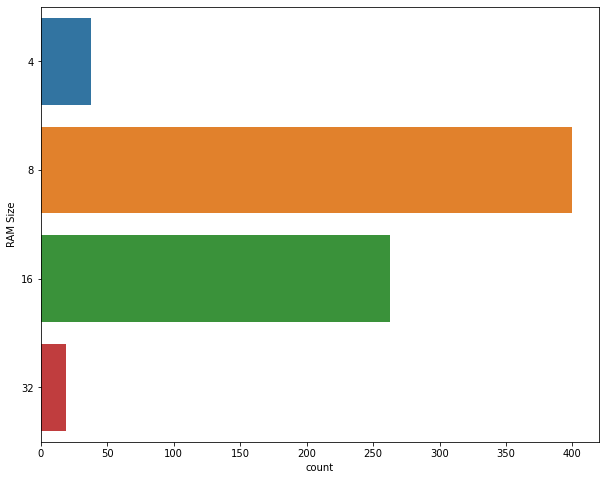

In [73]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['RAM Size'])
plt.show()

### Processor

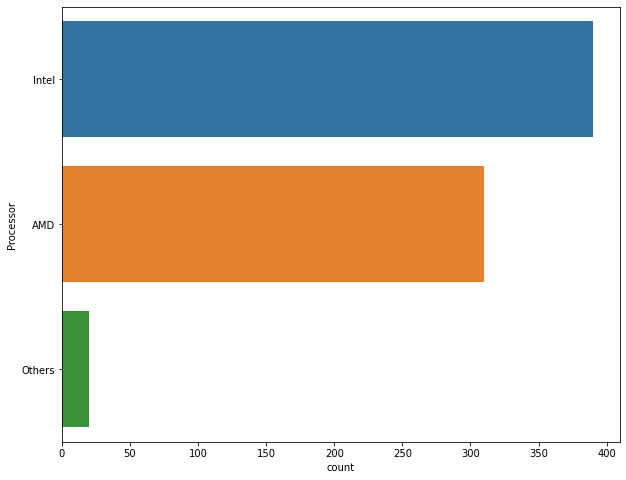

In [74]:
plt.figure(figsize=(10,8))
sns.countplot(y=df['Processor'])
plt.show()

### Warranty

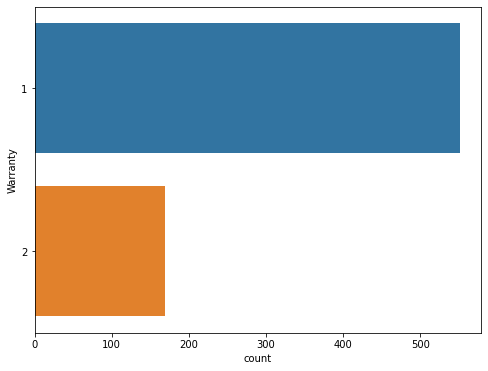

In [75]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['Warranty'])
plt.show()

### Disk Type

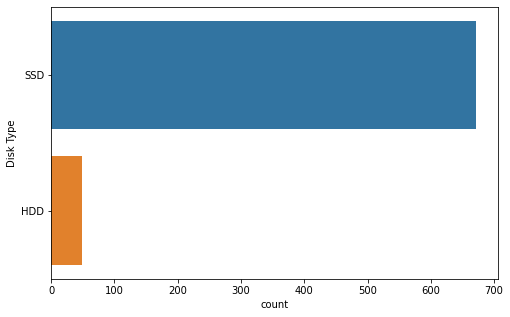

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['Disk Type'])
plt.show()

### Disk Size

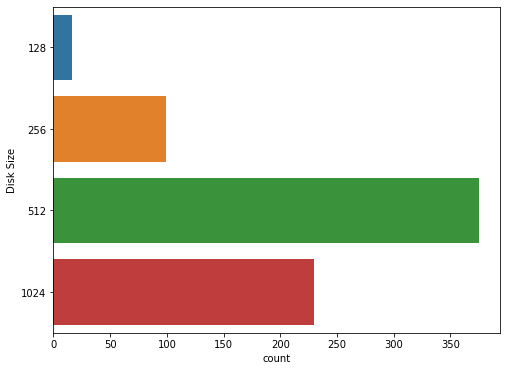

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['Disk Size'])
plt.show()

### Price

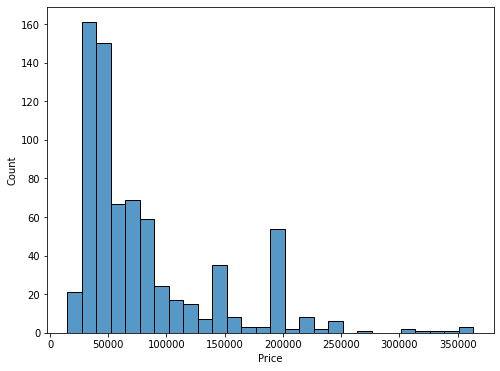

In [78]:
plt.figure(figsize=(8,6))
sns.histplot(x=df['Price'])
plt.show()

## Bivariate Analysis

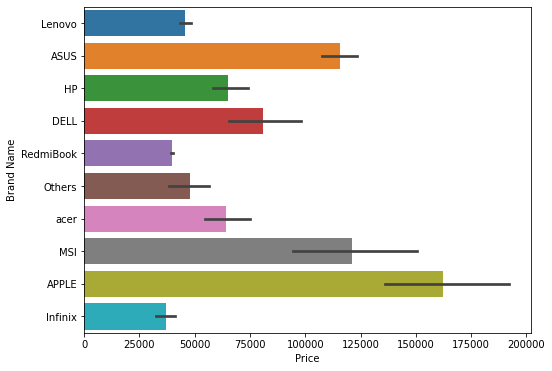

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(x='Price', y='Brand Name', data=df)
plt.show()

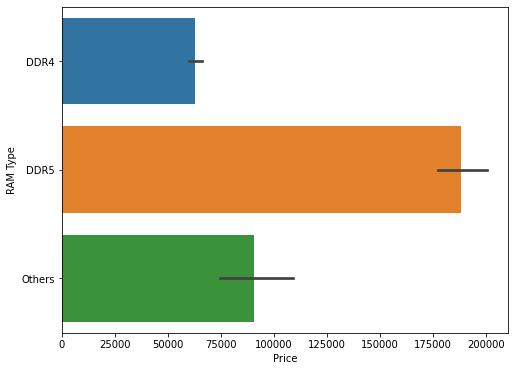

In [80]:
plt.figure(figsize=(8,6))
sns.barplot(x='Price', y='RAM Type', data=df)
plt.show()

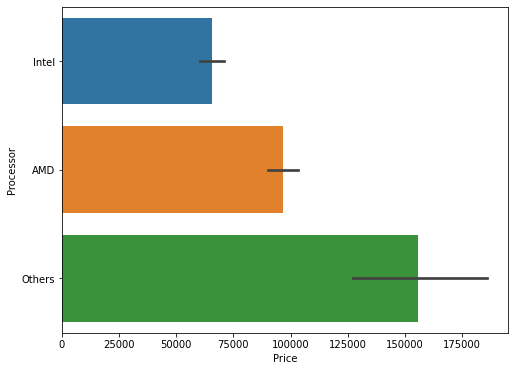

In [81]:
plt.figure(figsize=(8,6))
sns.barplot(x='Price', y='Processor', data=df)
plt.show()

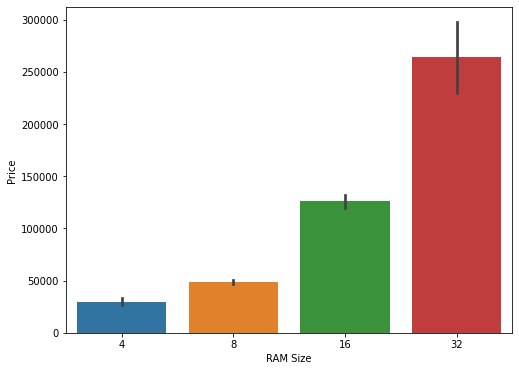

In [82]:
plt.figure(figsize=(8,6))
sns.barplot(x='RAM Size', y='Price', data=df)
plt.show()

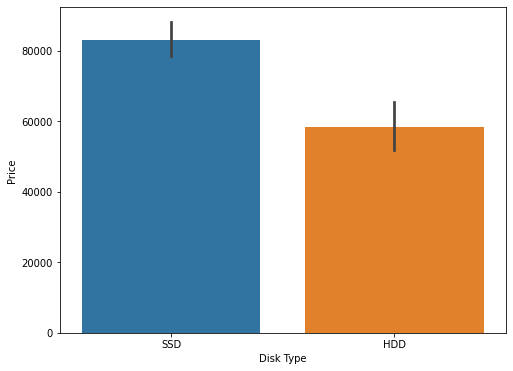

In [83]:
plt.figure(figsize=(8,6))
sns.barplot(x='Disk Type', y='Price', data=df)
plt.show()

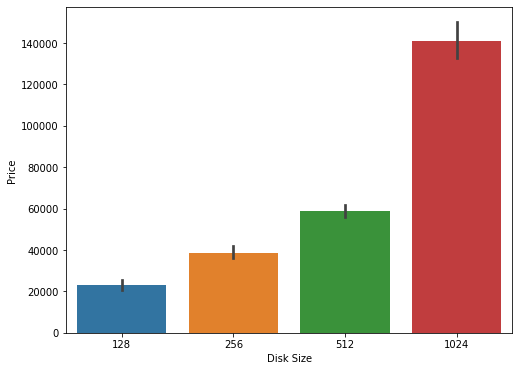

In [84]:
plt.figure(figsize=(8,6))
sns.barplot(x='Disk Size', y='Price', data=df)
plt.show()

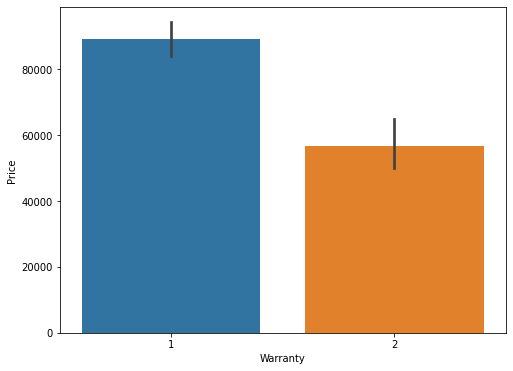

In [85]:
plt.figure(figsize=(8,6))
sns.barplot(x='Warranty', y='Price', data=df)
plt.show()